# import libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot  as plt
import time
import tensorflow as ts
from tensorflow import keras as tk

import warnings
warnings.filterwarnings("ignore")

# import the dataset

In [10]:
df = pd.read_csv('bank-additional-full-separated.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
# Summary Statistics for numerical data
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
# Summary Statistics for categorical data
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


# Choose Numerical Features

In [11]:
data = df[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
data.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


## Encoding The Non Numerically Features

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['job']=le.fit_transform(df['job'])
data['marital']=le.fit_transform(df['marital'])
data['education']=le.fit_transform(df['education'])
data['default']=le.fit_transform(df['default'])
data['housing']=le.fit_transform(df['housing'])
data['loan']=le.fit_transform(df['loan'])
data['contact']=le.fit_transform(df['contact'])
data['month']=le.fit_transform(df['month'])
data['day_of_week']=le.fit_transform(df['day_of_week'])
data['poutcome']=le.fit_transform(df['poutcome'])
data['y']=le.fit_transform(df['y'])
data.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,6,1,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,3,1,0,0,1,6,1,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,3,0,2,0,1,6,1,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,1,0,0,0,1,6,1,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,3,0,0,2,1,6,1,1,0


# split the data

In [18]:
X = data.drop('y', axis=1)
y = data['y']

print('X Shape:', X.shape)
print('y Shape:', y.shape)

X Shape: (41188, 20)
y Shape: (41188,)


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build The ANN

## Build layers of ANN

In [20]:
model = tk.Sequential([
    tk.layers.Flatten(),
    tk.layers.Dense(25, activation='relu'),
    tk.layers.Dense(25, activation='relu'),
    tk.layers.Dense(1, activation='sigmoid')
])

## Compile the ANN

In [21]:
model.compile('adam' ,'binary_crossentropy', metrics=['accuracy'])

## Train the model

In [23]:
t0 = time.time()
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=8)
t1 = time.time()

print("Time taken to train the model: ", t1-t0, "secs")

Epoch 1/50
4119/4119 [==============================] - 9s 2ms/step - loss: 0.8047 - accuracy: 0.8759 - val_loss: 0.4312 - val_accuracy: 0.9036
Epoch 2/50
4119/4119 [==============================] - 8s 2ms/step - loss: 0.4820 - accuracy: 0.8799 - val_loss: 0.2544 - val_accuracy: 0.9103
Epoch 3/50
4119/4119 [==============================] - 9s 2ms/step - loss: 0.3693 - accuracy: 0.8853 - val_loss: 0.4151 - val_accuracy: 0.8338
Epoch 4/50
4119/4119 [==============================] - 8s 2ms/step - loss: 0.2992 - accuracy: 0.8899 - val_loss: 0.2160 - val_accuracy: 0.9060
Epoch 5/50
4119/4119 [==============================] - 9s 2ms/step - loss: 0.2533 - accuracy: 0.8980 - val_loss: 0.2740 - val_accuracy: 0.9036
Epoch 6/50
4119/4119 [==============================] - 9s 2ms/step - loss: 0.2326 - accuracy: 0.8985 - val_loss: 0.2239 - val_accuracy: 0.9071
Epoch 7/50
4119/4119 [==============================] - 9s 2ms/step - loss: 0.2221 - accuracy: 0.9008 - val_loss: 0.2146 - val_accuracy:

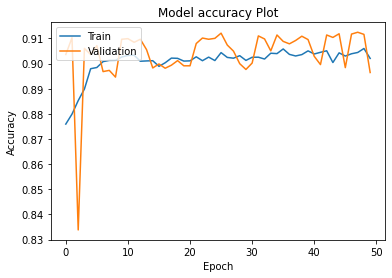

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy Plot')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

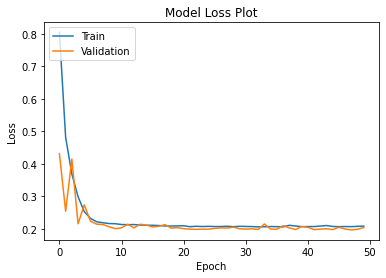

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss Plot')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Calculate the Accuracy

In [26]:
loss_value, acc_value = model.evaluate(X_test, y_test)

258/258 [==============================] - 0s 1ms/step - loss: 0.2044 - accuracy: 0.8965


In [27]:
print('Model Accuracy =', acc_value * 100, "%")

Model Accuracy = 89.6455466747284 %


In [28]:
y_predictions = model.predict(X_test)

258/258 [==============================] - 0s 1ms/step


## Summary of the model

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 20)                0         
                                                                 
 dense (Dense)               (None, 25)                525       
                                                                 
 dense_1 (Dense)             (None, 25)                650       
                                                                 
 dense_2 (Dense)             (None, 1)                 26        
                                                                 
Total params: 1,201
Trainable params: 1,201
Non-trainable params: 0
_________________________________________________________________
